In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
home = pd.read_csv("home_page_table.csv")
payment_con = pd.read_csv("payment_confirmation_table.csv")
payment_page = pd.read_csv("payment_page_table.csv")
search = pd.read_csv("search_page_table.csv")
user = pd.read_csv("user_table.csv")

In [5]:
home.head(
)

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [6]:
payment_con.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [7]:
payment_page.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [8]:
user.head(

)

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [9]:
search.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [10]:
data = pd.merge(left=user, right=home, how='left', on='user_id')
data = pd.merge(left=data, right=search, how='left', on='user_id', suffixes=('_home', '_search'))
data = pd.merge(left=data, right=payment_page, how='left', on='user_id')
data = pd.merge(left=data, right=payment_page, how='left', on='user_id', suffixes=('_payment', '_confirmation'))
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            90400 non-null  int64 
 1   date               90400 non-null  object
 2   device             90400 non-null  object
 3   sex                90400 non-null  object
 4   page_home          90400 non-null  object
 5   page_search        45200 non-null  object
 6   page_payment       6030 non-null   object
 7   page_confirmation  6030 non-null   object
dtypes: int64(1), object(7)
memory usage: 5.5+ MB


In [12]:
data.describe()

,user_id
count,90400.000000
mean,498709.683473
std,289040.674085
min,17.000000
25%,247978.750000
50%,498267.000000
75%,749789.250000
max,999979.000000


In [13]:
def conversion_rate(data):
    rates = []
    home_users = data[~data['page_home'].isnull()]
    rate1 = 1 - home_users['page_search'].isnull().sum() / len(home_users)
    rates.append(rate1)
    search_users = data[~data['page_search'].isnull()]
    rate2 = 1 - search_users['page_payment'].isnull().sum() / len(search_users)
    rates.append(rate2)
    payment_users = data[~data['page_payment'].isnull()]
    rate3 = 1 - payment_users['page_confirmation'].isnull().sum() / len(payment_users)
    rates.append(rate3)
    return rates

In [14]:
overall_rates = conversion_rate(data)
steps = ['Home → Search', 'Search → Payment', 'Payment → Confirmation']
overall_df = pd.DataFrame({'Step': steps, 'Conversion Rate': overall_rates})

C:\Users\user\AppData\Local\Temp\ipykernel_12320\112312239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Step', y='Conversion Rate', data=overall_df, palette='Blues')


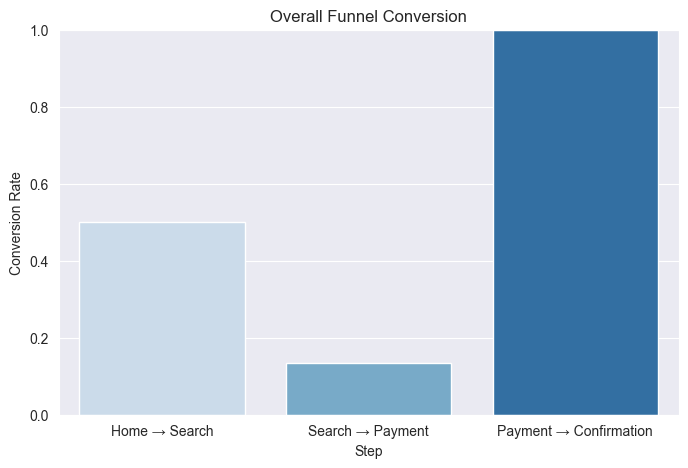

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Step', y='Conversion Rate', data=overall_df, palette='Blues')
plt.title('Overall Funnel Conversion')
plt.ylim(0, 1)
plt.show()

In [16]:
desktop_data = data[data['device'] == 'Desktop']
mobile_data = data[data['device'] == 'Mobile']

In [17]:
desktop_rates = conversion_rate(desktop_data)
mobile_rates = conversion_rate(mobile_data)

In [18]:
device_df = pd.DataFrame({
    'Step': steps * 2,
    'Conversion Rate': desktop_rates + mobile_rates,
    'Device': ['Desktop'] * 3 + ['Mobile'] * 3
})

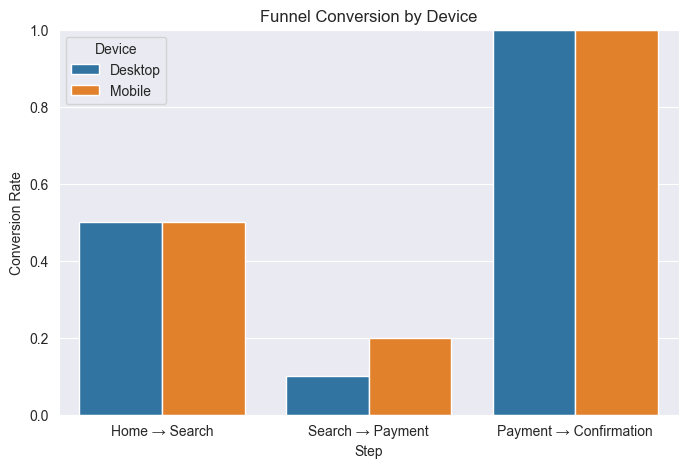

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Step', y='Conversion Rate', hue='Device', data=device_df)
plt.title('Funnel Conversion by Device')
plt.ylim(0, 1)
plt.show()

In [20]:
male_data = data[data['sex'] == 'Male']
female_data = data[data['sex'] == 'Female']

In [21]:
male_rates = conversion_rate(male_data)
female_rates = conversion_rate(female_data)

In [22]:
sex_df = pd.DataFrame({
    'Step': steps * 2,
    'Conversion Rate': male_rates + female_rates,
    'Sex': ['Male'] * 3 + ['Female'] * 3
})

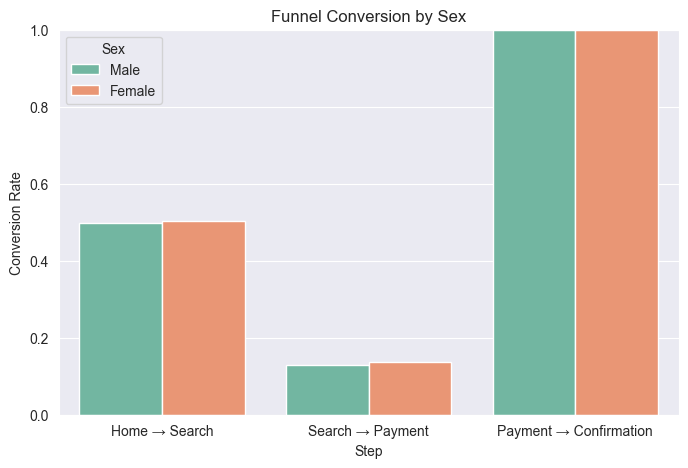

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Step', y='Conversion Rate', hue='Sex', data=sex_df, palette='Set2')
plt.title('Funnel Conversion by Sex')
plt.ylim(0, 1)
plt.show()